In [1]:
# import scneario-properties-baseline.pkl
import pickle

with open('scenario-properties-baseline.pkl', 'rb') as f:
    baseline = pickle.load(f)

In [42]:
for i in baseline.collision_pairs:
    print(i, i.name)

<utils.simulation.species_pair_class.SpeciesPairClass object at 0x00000231A45FBD30> species_pair(S_148kg, S_750kg)
<utils.simulation.species_pair_class.SpeciesPairClass object at 0x00000231A537D880> species_pair(S_148kg, S_1250kg)
<utils.simulation.species_pair_class.SpeciesPairClass object at 0x00000231A53A5D90> species_pair(S_148kg, Su_260kg)
<utils.simulation.species_pair_class.SpeciesPairClass object at 0x00000231A53DF610> species_pair(S_148kg, Su_473kg)
<utils.simulation.species_pair_class.SpeciesPairClass object at 0x00000231A5408B80> species_pair(S_148kg, Sns)
<utils.simulation.species_pair_class.SpeciesPairClass object at 0x00000231A5442220> species_pair(S_148kg, N_0.00141372kg)
<utils.simulation.species_pair_class.SpeciesPairClass object at 0x00000231A545EF10> species_pair(S_148kg, N_0.567kg)
<utils.simulation.species_pair_class.SpeciesPairClass object at 0x00000231A548A9D0> species_pair(S_148kg, N_148kg)
<utils.simulation.species_pair_class.SpeciesPairClass object at 0x000002

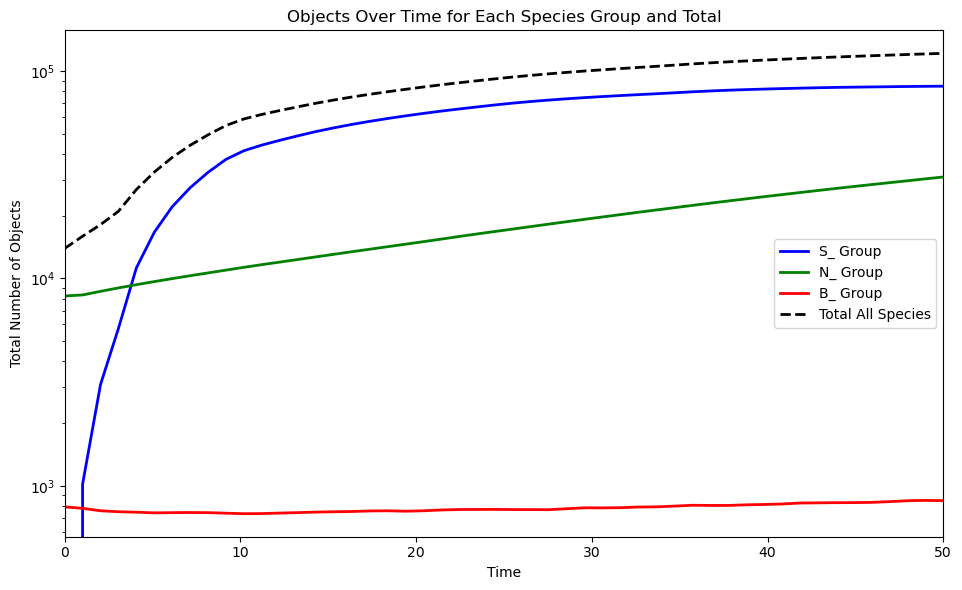

In [57]:
# Plot total objects over time for each species group and total
import numpy as np
import matplotlib.pyplot as plt

output = baseline.output  # Output object from simulation
n_species = baseline.species_length  # Number of species
num_shells = baseline.n_shells  # Number of shells per species
species_names = baseline.species_names  # List of species names
plt.figure(figsize=(10, 6))

total_objects_all_species = np.zeros_like(output.t)

# Initialize arrays for different species groups
total_objects_S_group = np.zeros_like(output.t)
total_objects_N_group = np.zeros_like(output.t)
total_objects_B_group = np.zeros_like(output.t)

for i in range(n_species):
    start_idx = i * num_shells
    end_idx = start_idx + num_shells
    total_objects_per_species = np.sum(output.y[start_idx:end_idx, :], axis=0)

    # Check species group by name and sum accordingly
    species_name = species_names[i]
    
    if species_name.startswith('S_'):
        total_objects_S_group += total_objects_per_species
    elif species_name.startswith('N_'):
        total_objects_N_group += total_objects_per_species
    elif species_name.startswith('B_'):
        total_objects_B_group += total_objects_per_species
    
    total_objects_all_species += total_objects_per_species

# Plot each species group in different colors
plt.plot(output.t, total_objects_S_group, label='S_ Group', color='blue', linewidth=2)
plt.plot(output.t, total_objects_N_group, label='N_ Group', color='green', linewidth=2)
plt.plot(output.t, total_objects_B_group, label='B_ Group', color='red', linewidth=2)

# Plot the total number of objects for all species combined
plt.plot(output.t, total_objects_all_species, label='Total All Species', color='k', linewidth=2, linestyle='--')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Total Number of Objects')
plt.title('Objects Over Time for Each Species Group and Total')
plt.xlim(0, max(output.t))
plt.legend()
plt.tight_layout()
plt.yscale('log')

# Save the figure
plt.savefig('figures/total_objects_by_species_group.png')
plt.close()


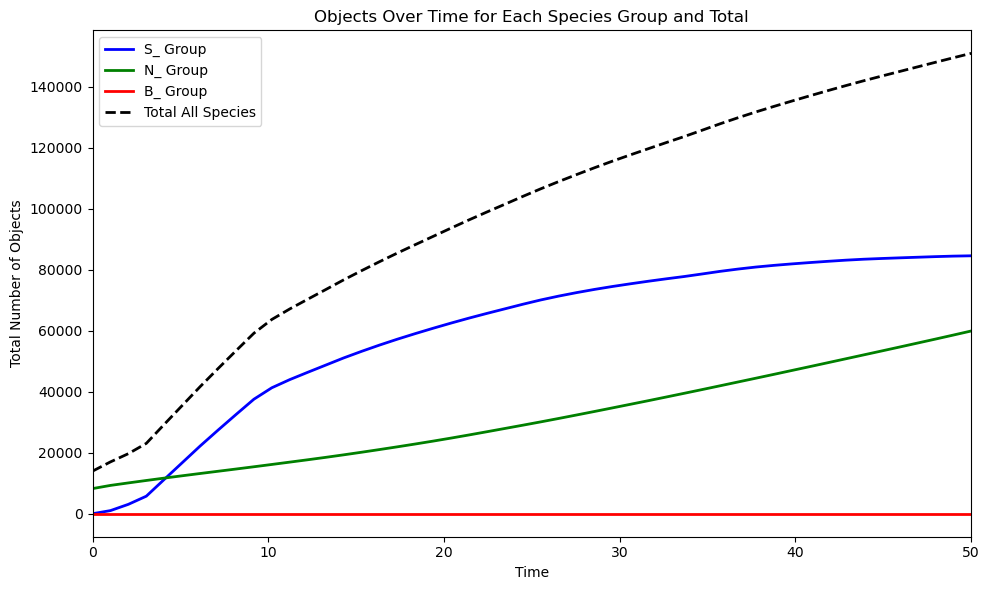

In [68]:
# Plot total objects over time for each species group and total
import numpy as np
import matplotlib.pyplot as plt

# # load the baseline pickle file
with open('scenario-properties-baseline.pkl', 'rb') as f:
    baseline_1 = pickle.load(f)

output = baseline_1.output  # Output object from simulation
n_species = baseline_1.species_length  # Number of species
num_shells = baseline_1.n_shells  # Number of shells per species
species_names = baseline_1.species_names  # List of species names
plt.figure(figsize=(10, 6))

total_objects_all_species = np.zeros_like(output.t)

# Initialize arrays for different species groups
total_objects_S_group = np.zeros_like(output.t)
total_objects_N_group = np.zeros_like(output.t)
total_objects_B_group = np.zeros_like(output.t)

for i in range(n_species):
    start_idx = i * num_shells
    end_idx = start_idx + num_shells
    total_objects_per_species = np.sum(output.y[start_idx:end_idx, :], axis=0)

    # Check species group by name and sum accordingly
    species_name = species_names[i]
    
    if species_name.startswith('S_'):
        total_objects_S_group += total_objects_per_species
    elif species_name.startswith('N_'):
        total_objects_N_group += total_objects_per_species
    elif species_name.startswith('B_'):
        total_objects_B_group += total_objects_per_species
    
    total_objects_all_species += total_objects_per_species

# Plot each species group in different colors
plt.plot(output.t, total_objects_S_group, label='S_ Group', color='blue', linewidth=2)
plt.plot(output.t, total_objects_N_group, label='N_ Group', color='green', linewidth=2)
plt.plot(output.t, total_objects_B_group, label='B_ Group', color='red', linewidth=2)

# Plot the total number of objects for all species combined
plt.plot(output.t, total_objects_all_species, label='Total All Species', color='k', linewidth=2, linestyle='--')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Total Number of Objects')
plt.title('Objects Over Time for Each Species Group and Total')
plt.xlim(0, max(output.t))
plt.legend()
plt.tight_layout()

# Save the figure
#plt.savefig('figures/total_objects_by_species_group.png')
#plt.close()


In [65]:
# # load the baseline pickle file
with open('scenario-properties-baseline-spreading.pkl', 'rb') as f:
    baseline_spreading = pickle.load(f)


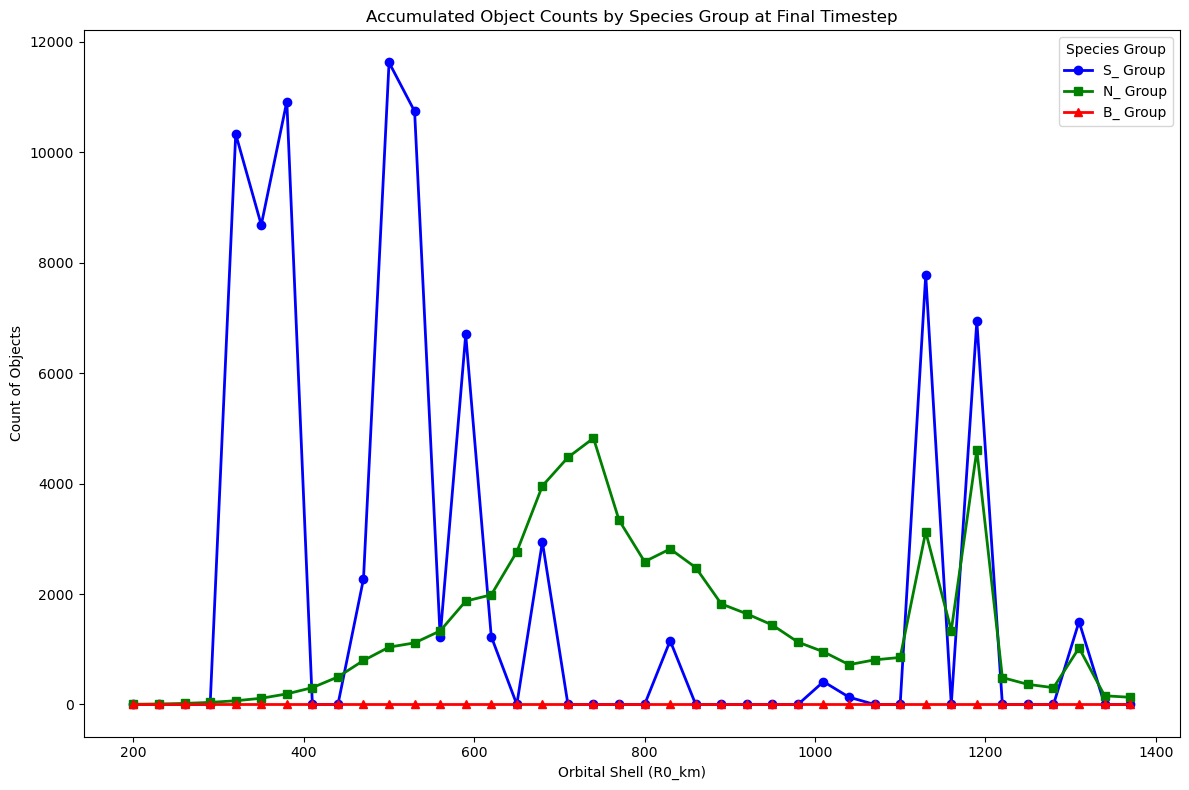

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Extract the unique base species names (part before the underscore)
base_species_names = [name.split('_')[0] for name in species_names]

# Reshape the data to separate species and shells
n_time_points = len(baseline_spreading.output.t)
data_reshaped = output.y.reshape(n_species, num_shells, n_time_points)

# Get the x-axis labels from scenario_properties.R0_km and slice to match shells_per_species
orbital_shell_labels = baseline_spreading.R0_km[:num_shells]

# Sum species by group (S_, N_, B_)
S_group_sum = np.zeros(num_shells)
N_group_sum = np.zeros(num_shells)
B_group_sum = np.zeros(num_shells)

# Loop through species and accumulate counts for S_, N_, and B_ groups at the final timestep
final_timestep = n_time_points - 1
for species_index in range(n_species):
    species_name = species_names[species_index]
    species_data_final_timestep = data_reshaped[species_index, :, final_timestep]

    if species_name.startswith('S_'):
        S_group_sum += species_data_final_timestep
    elif species_name.startswith('N_'):
        N_group_sum += species_data_final_timestep
    elif species_name.startswith('B_'):
        B_group_sum += species_data_final_timestep

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the accumulated sums for each group
plt.plot(orbital_shell_labels, S_group_sum, label='S_ Group', color='blue', linewidth=2, marker='o')
plt.plot(orbital_shell_labels, N_group_sum, label='N_ Group', color='green', linewidth=2, marker='s')
plt.plot(orbital_shell_labels, B_group_sum, label='B_ Group', color='red', linewidth=2, marker='^')

# Add labels, title, and legend
plt.xlabel('Orbital Shell (R0_km)')
plt.ylabel('Count of Objects')
plt.title('Accumulated Object Counts by Species Group at Final Timestep')
plt.legend(title='Species Group')
plt.tight_layout()

# Save the figure or display it
# plt.savefig('figures/final_timestep_species_groups.png')
plt.show()

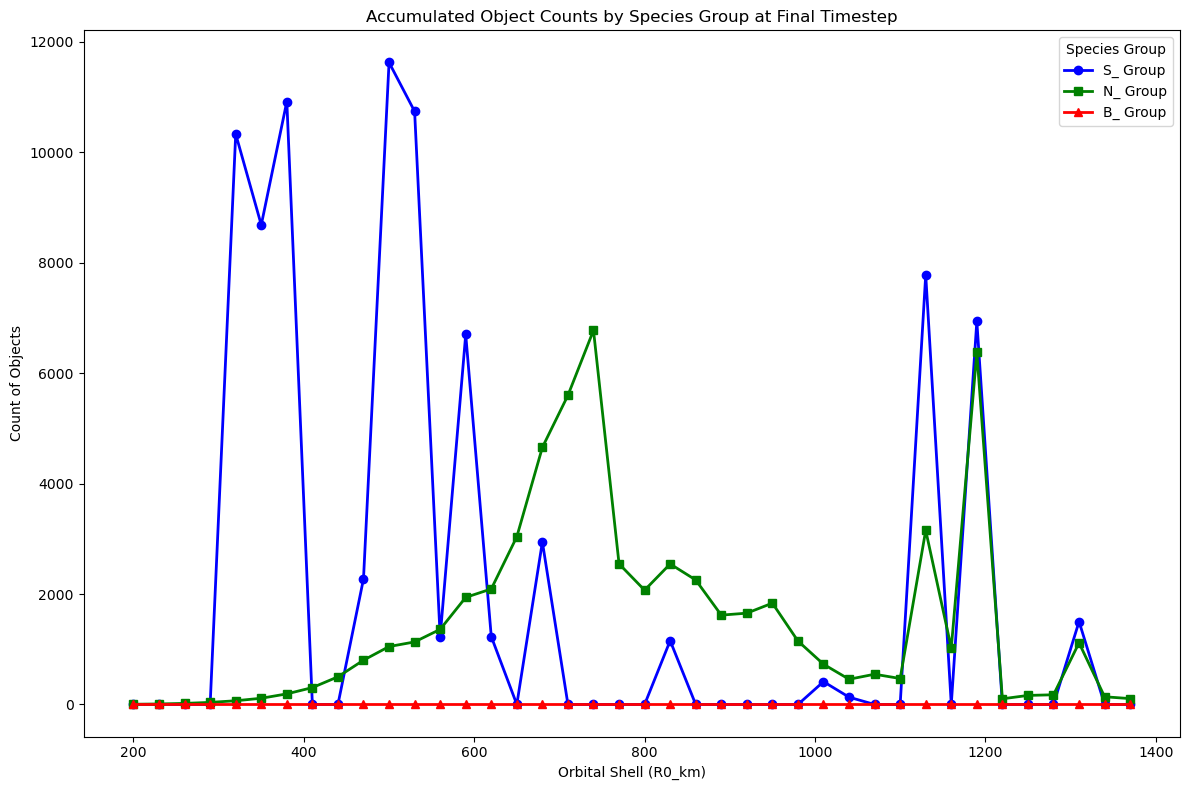

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import os

# # load the baseline pickle file
with open('scenario-properties-baseline.pkl', 'rb') as f:
    baseline_1 = pickle.load(f)
    
# Extract the unique base species names (part before the underscore)
base_species_names = [name.split('_')[0] for name in species_names]

# Reshape the data to separate species and shells
n_time_points = len(baseline_1.output.t)
data_reshaped = output.y.reshape(n_species, num_shells, n_time_points)

# Get the x-axis labels from scenario_properties.R0_km and slice to match shells_per_species
orbital_shell_labels = baseline_1.R0_km[:num_shells]

# Sum species by group (S_, N_, B_)
S_group_sum = np.zeros(num_shells)
N_group_sum = np.zeros(num_shells)
B_group_sum = np.zeros(num_shells)

# Loop through species and accumulate counts for S_, N_, and B_ groups at the final timestep
final_timestep = n_time_points - 1
for species_index in range(n_species):
    species_name = species_names[species_index]
    species_data_final_timestep = data_reshaped[species_index, :, final_timestep]

    if species_name.startswith('S_'):
        S_group_sum += species_data_final_timestep
    elif species_name.startswith('N_'):
        N_group_sum += species_data_final_timestep
    elif species_name.startswith('B_'):
        B_group_sum += species_data_final_timestep

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the accumulated sums for each group
plt.plot(orbital_shell_labels, S_group_sum, label='S_ Group', color='blue', linewidth=2, marker='o')
plt.plot(orbital_shell_labels, N_group_sum, label='N_ Group', color='green', linewidth=2, marker='s')
plt.plot(orbital_shell_labels, B_group_sum, label='B_ Group', color='red', linewidth=2, marker='^')

# Add labels, title, and legend
plt.xlabel('Orbital Shell (R0_km)')
plt.ylabel('Count of Objects')
plt.title('Accumulated Object Counts by Species Group at Final Timestep')
plt.legend(title='Species Group')
plt.tight_layout()

# Save the figure or display it
# plt.savefig('figures/final_timestep_species_groups.png')
plt.show()

In [1]:
import pickle

# # load the baseline pickle file
with open('figures/dodgy-elliptical/scenario-properties-baseline.pkl', 'rb') as f:
    baseline_1 = pickle.load(f)
    

In [2]:
baseline_1.fragment_spreading

True